In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
# fardina has a priming question before the AITA questions

df1 = pd.read_csv('data/max_spring2025.csv')
df2 = pd.read_csv('data/max_all.csv')
df3 = pd.read_csv('data/fardina_all.csv')
df4 = pd.read_csv('data/2024.csv')

In [4]:
df1.columns

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness?',
       'What bests represents your gender?',
       'My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?',
       'My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-moth

In [42]:
df2["religion"].value_counts()

religion
Not spiritual at all    47
Somewhat spiritual      34
Strongly spiritual      17
Name: count, dtype: int64

In [5]:
df2.columns

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness / spirituality?',
       'What bests represents your gender?',
       'My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?',
       'My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. He

In [6]:
df3.columns

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness / spirituality?',
       'What bests represents your gender?',
       'Would you describe yourself as compassionate?',
       'My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?',
       'My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her

In [7]:
df4.columns

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness?',
       'What bests represents your gender?',
       'My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?',
       'My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-moth

In [8]:
#exact phrasings for df1 questions
questions = [
    'Timestamp', 
    'What year are you?', 
    'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness?',
       'What bests represents your gender?',
      "My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?",
       "My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-mother practically raised him from a baby and I think that she deserves it far more than me. He was really upset and hurt when I said no. Am I a jerk?'",
       "I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my boyfriend, who comes from a poor family, and we split things 50-50. Recently, he found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making him split things 50/50. I told him it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?",
       "My husband and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My husband's son currently goes to a much less nice public school. My husband says I'm a jerk for not paying for his son to go to private school as well.",
       "I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?",
       "My brother's nine year old son is poorly behaved. One day, my brother dropped the son off on my doorstep without my consent and drove off, texting me that he needed me to watch his son for the day. The son complained of being hungry, so I gave him the leftovers I had. He said he didn't like them, but I told him that's all there was. He put them in the microwave until they burned, then told me he couldn't eat them and we would have to go out and get food. I told him that was what there was to eat, and if he ruined it he'd have to wait for his dad to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?",
       "My parents want us to come out for their anniversary, and bought my brother and I tickets on the same flight. My brother has two kids - a 6 month old and a 5 year old. He is currently separated from his wife so he would have to handle 2 children by herself on a 10 hour flight.\n\nHe calls me up a week or so beforehand and asks me if I will be willing to help him take care of his kids on the flight, and something about taking shifts so we can both sleep. I tell him that I wasn't comfortable with that, but he says 'nephew loves you so much' so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my brother. Am I a jerk?",
       "I'm a single dad with four kids, one of whom has a different mother from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?",
       "I have a child with a father who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's father to make sure he's paying adequate child support. Periodically I either hire an investigator or her dad just tells me he got a raise and I go to court to adjust the child support accordingly. The last time I did this, he didn't show up for court and I apparently overestimated how much his raise was and I got a default judgment. He called me up and practically pleaded with me to lower his payments after I said no he insulted me and my son. Am I a jerk?",
       "One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for him schooling unless he picked a career path that will make at least 100,000 a year. Am I a jerk?",
       "I was in a conflict with my father-in-law's girlfriend, in which I made a snide comment about she's never paid child support to his ex. Later, she called me and told me if I ever said anything like that ever again she'd sue me for defamation. I took the threat seriously, as she is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?",
       "Some of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?",
       "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?",
       "My brother is going to be a groomsman at my wedding. His hair was dyed, but he recently decided to grow it out, so parts of it are bleached and part are not. I told him it wouldn't look good in the pictures, and offered to pay for him to dye it. He said no, and I said he couldn't be in the wedding party. Am I a jerk?",
      ]

questions_succint = [
    "time",
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

questions_succint_primer = [
    "time",
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
    "compassion primer",
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

aita_questions = [
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

In [9]:
df1.columns = questions_succint
df2.columns = questions_succint
df3.columns = questions_succint_primer
df4.columns = questions_succint

In [10]:
personal = [
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
]

In [11]:
df4["year"].value_counts()

year
Junior              63
Sophmore            25
Senior              22
Graduate Student    22
Freshman             1
Name: count, dtype: int64

In [12]:
df3_clean = df3.drop(columns=["compassion primer"])

In [13]:
age_range = ["19","19.0","20","20.0","21","21.0", 19, 20, 21]
df1_clean = df1[df1["age"].isin(age_range)]
df2_clean = df2[df2["age"].isin(age_range)]
df3_clean = df3_clean[df3_clean["age"].isin(age_range)]
df4_clean = df4[df4["age"].isin(age_range)]

In [14]:
politics = [
    "Strongly liberal",
    "Mildly liberal",
    "Neutral",
    "Mildly conservative",
]
df1_clean = df1_clean[df1_clean["self"].isin(politics)]
df2_clean = df2_clean[df2_clean["self"].isin(politics)]
df3_clean = df3_clean[df3_clean["self"].isin(politics)]
df4_clean = df4_clean[df4_clean["self"].isin(politics)]

In [15]:
for df in [df1_clean, df2_clean, df3_clean, df4_clean]:
    df["age"] = df["age"].apply(lambda x: str(float(x)))

In [16]:
for df in [df1_clean, df2_clean, df3_clean, df4_clean]:
    df["gender"] = df["gender"].apply(lambda x: x if x != "Famale" else "Female")

In [17]:
df1_clean = df1_clean[df1_clean["gender"].isin(["Male", "Female"])]
df2_clean = df2_clean[df2_clean["gender"].isin(["Male", "Female"])]
df3_clean = df3_clean[df3_clean["gender"].isin(["Male", "Female"])]
df4_clean = df4_clean[df4_clean["gender"].isin(["Male", "Female"])]

In [18]:
df1_clean = df1_clean[df1_clean["year"].isin(["Junior", "Senior", "Sophmore"])]
df2_clean = df2_clean[df2_clean["year"].isin(["Junior", "Senior", "Sophmore"])]
df3_clean = df3_clean[df3_clean["year"].isin(["Junior", "Senior", "Sophmore"])]
df4_clean = df4_clean[df4_clean["year"].isin(["Junior", "Senior", "Sophmore"])]

In [19]:
df1_clean["religion"] = df1_clean["religion"].apply(lambda x: x if x != "Not spiritual at all" else "Not religious at all")
df1_clean["religion"] = df1_clean["religion"].apply(lambda x: x if x != "Somewhat spiritual" else "Somewhat religious")
df1_clean["religion"] = df1_clean["religion"].apply(lambda x: x if x != "Strongly spiritual" else "Strongly religious")
df2_clean["religion"] = df2_clean["religion"].apply(lambda x: x if x != "Not spiritual at all" else "Not religious at all")
df2_clean["religion"] = df2_clean["religion"].apply(lambda x: x if x != "Somewhat spiritual" else "Somewhat religious")
df2_clean["religion"] = df2_clean["religion"].apply(lambda x: x if x != "Strongly spiritual" else "Strongly religious")
df3_clean["religion"] = df3_clean["religion"].apply(lambda x: x if x != "Not spiritual at all" else "Not religious at all")
df3_clean["religion"] = df3_clean["religion"].apply(lambda x: x if x != "Somewhat spiritual" else "Somewhat religious")
df3_clean["religion"] = df3_clean["religion"].apply(lambda x: x if x != "Strongly spiritual" else "Strongly religious")
df4_clean["religion"] = df4_clean["religion"].apply(lambda x: x if x != "Not spiritual at all" else "Not religious at all")
df4_clean["religion"] = df4_clean["religion"].apply(lambda x: x if x != "Somewhat spiritual" else "Somewhat religious")
df4_clean["religion"] = df4_clean["religion"].apply(lambda x: x if x != "Strongly spiritual" else "Strongly religious")

In [20]:
len(df1_clean), len(df2_clean), len(df3_clean), len(df4_clean)

(71, 77, 111, 87)

In [21]:
df_male_questions = pd.concat([df1_clean, df4_clean], axis=0).reset_index(drop=True)
df_female_questions = pd.concat([df2_clean, df3_clean], axis=0).reset_index(drop=True)

In [22]:
for i in aita_questions:
    data = pd.crosstab(df_male_questions[i], df_male_questions['gender'])
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

doctor
p value is 0.41073034647561035
Independent (H0 holds true)

reading
p value is 0.6915786273490332
Independent (H0 holds true)

trust fund
p value is 0.009475339969212985
Dependent (reject H0)

private school
p value is 0.24965225231531282
Independent (H0 holds true)

cat
p value is 0.11932937385804981
Independent (H0 holds true)

burned food
p value is 0.2856132269055819
Independent (H0 holds true)

flight
p value is 0.18130638075607447
Independent (H0 holds true)

child support
p value is 0.7647415402010531
Independent (H0 holds true)

investigation
p value is 0.47686169898330755
Independent (H0 holds true)

expensive school
p value is 0.3158376053560527
Independent (H0 holds true)

in law
p value is 0.6813893272425386
Independent (H0 holds true)

lgbtq
p value is 0.12278703565060316
Independent (H0 holds true)

drinking
p value is 0.8188683297328045
Independent (H0 holds true)

hair dye
p value is 0.5430632238684905
Independent (H0 holds true)



In [23]:
for i in aita_questions:
    data = pd.crosstab(df_female_questions[i], df_female_questions['gender'])
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

doctor
p value is 0.23309188854603244
Independent (H0 holds true)

reading
p value is 0.7199154741185325
Independent (H0 holds true)

trust fund
p value is 0.49009886835315497
Independent (H0 holds true)

private school
p value is 0.6539612283165008
Independent (H0 holds true)

cat
p value is 0.3293719126277933
Independent (H0 holds true)

burned food
p value is 0.3165121096205228
Independent (H0 holds true)

flight
p value is 0.2842310881184796
Independent (H0 holds true)

child support
p value is 0.469154412815728
Independent (H0 holds true)

investigation
p value is 0.07253175045237976
Independent (H0 holds true)

expensive school
p value is 0.6610110738832289
Independent (H0 holds true)

in law
p value is 0.32322219885707393
Independent (H0 holds true)

lgbtq
p value is 0.5003708849283541
Independent (H0 holds true)

drinking
p value is 0.1612251971724985
Independent (H0 holds true)

hair dye
p value is 0.14825977705543605
Independent (H0 holds true)



In [24]:
for i in aita_questions:
    df_male_questions[i + " male"] = df_male_questions[i]

In [25]:
# Not a jerk = 0, Mildly a jerk = 1, Strongly a jerk = 2
aita_values = [aita_questions[i] + " numeric" for i in range(len(aita_questions))] 

In [26]:
for i in range(len(aita_questions)):
    df_male_questions[aita_values[i]] = df_male_questions[aita_questions[i]].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})
    df_female_questions[aita_values[i]] = df_female_questions[aita_questions[i]].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})

In [27]:
df_female_questions["self"].value_counts()

self
Mildly liberal         80
Neutral                43
Strongly liberal       41
Mildly conservative    24
Name: count, dtype: int64

In [28]:
for i in aita_values:
    df_temp = pd.DataFrame({"gendered": ["male"] * len(df_male_questions[i]) + ["female"] * len(df_female_questions[i]),
                        i: list(df_male_questions[i]) + list(df_female_questions[i])})
    
    data = pd.crosstab(df_temp[i], df_temp["gendered"])
    print(data.head())
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

gendered        female  male
doctor numeric              
0.0                 75    95
1.0                 99    57
2.0                 13     6
doctor numeric
p value is 0.0009585803589287614
Dependent (reject H0)

gendered         female  male
reading numeric              
0.0                  82    73
1.0                  79    66
2.0                  26    18
reading numeric
p value is 0.7670532164505425
Independent (H0 holds true)

gendered            female  male
trust fund numeric              
0.0                     81    79
1.0                     67    58
2.0                     39    21
trust fund numeric
p value is 0.16031832234205443
Independent (H0 holds true)

gendered                female  male
private school numeric              
0.0                         85   112
1.0                         65    30
2.0                         34    16
private school numeric
p value is 2.4652236268615628e-05
Dependent (reject H0)

gendered     female  male
cat numeric             

In [29]:
succint = [
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender"
    ]

demos = {i: list(df_male_questions[i]) for i in succint}
for j in demos:
    print(j)
    for i in aita_values:
        demos_temp = demos.copy()
        demos_temp.update({"gendered": ["male"] * len(df_male_questions[i]),
                            i: list(df_male_questions[i])})
        df_temp = pd.DataFrame(demos_temp)
        
        data = pd.crosstab(df_temp[i], df_temp[j])
        print(data.head())
        stat, p, dof, expected = chi2_contingency(data)

        print(i)
        # interpret p-value
        alpha = 0.05
        print("p value is " + str(p))
        if p <= alpha:
            print('Dependent (reject H0)')
        else:
            print('Independent (H0 holds true)')
        print()

year
year            Junior  Senior  Sophmore
doctor numeric                          
0                   44       9        42
1                   24       6        27
2                    3       0         3
doctor numeric
p value is 0.9224512517333505
Independent (H0 holds true)

year             Junior  Senior  Sophmore
reading numeric                          
0.0                  39       5        29
1.0                  25       8        33
2.0                   6       2        10
reading numeric
p value is 0.31606633398937184
Independent (H0 holds true)

year                Junior  Senior  Sophmore
trust fund numeric                          
0                       35       7        37
1                       26       8        24
2                       10       0        11
trust fund numeric
p value is 0.45364718492133016
Independent (H0 holds true)

year                    Junior  Senior  Sophmore
private school numeric                          
0                           

In [30]:
succint = [
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender"
    ]

demos = {i: list(df_female_questions[i]) for i in succint}
for j in demos:
    print(j)
    for i in aita_values:
        demos_temp = demos.copy()
        demos_temp.update({"gendered": ["female"] * len(df_female_questions[i]),
                            i: list(df_female_questions[i])})
        df_temp = pd.DataFrame(demos_temp)
        
        data = pd.crosstab(df_temp[i], df_temp[j])
        print(data.head())
        stat, p, dof, expected = chi2_contingency(data)

        print(i)
        # interpret p-value
        alpha = 0.05
        print("p value is " + str(p))
        if p <= alpha:
            print('Dependent (reject H0)')
        else:
            print('Independent (H0 holds true)')
        print()

year
year            Junior  Senior  Sophmore
doctor numeric                          
0.0                 53       8        14
1.0                 67      12        20
2.0                  9       3         1
doctor numeric
p value is 0.6609654063113244
Independent (H0 holds true)



year             Junior  Senior  Sophmore
reading numeric                          
0.0                  56       7        19
1.0                  51      14        14
2.0                  22       2         2
reading numeric
p value is 0.13424363125499822
Independent (H0 holds true)

year                Junior  Senior  Sophmore
trust fund numeric                          
0.0                     50      13        18
1.0                     50       5        12
2.0                     29       5         5
trust fund numeric
p value is 0.33324980403298976
Independent (H0 holds true)

year                    Junior  Senior  Sophmore
private school numeric                          
0.0                         59      10        16
1.0                         47       6        12
2.0                         20       7         7
private school numeric
p value is 0.5509686858196639
Independent (H0 holds true)

year         Junior  Senior  Sophmore
cat numeric                          
0.0    

In [31]:

questions_succint = [
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender"
    ]

demos = {i: list(df_male_questions[i]) + list(df_female_questions[i]) for i in questions_succint}
for j in demos:
    print(j)
    for i in aita_values:
        demos_temp = demos.copy()
        demos_temp.update({"gendered": ["male"] * len(df_male_questions[i]) + ["female"] * len(df_female_questions[i]),
                            i: list(df_male_questions[i]) + list(df_female_questions[i])})
        df_temp = pd.DataFrame(demos_temp)
        
        data = pd.crosstab(df_temp[i], df_temp[j])
        print(data.head())
        stat, p, dof, expected = chi2_contingency(data)

        print(i)
        # interpret p-value
        alpha = 0.05
        print("p value is " + str(p))
        if p <= alpha:
            print('Dependent (reject H0)')
        else:
            print('Independent (H0 holds true)')
        print()


year
year            Junior  Senior  Sophmore
doctor numeric                          
0.0                 97      17        56
1.0                 91      18        47
2.0                 12       3         4
doctor numeric
p value is 0.8163048758525231
Independent (H0 holds true)

year             Junior  Senior  Sophmore
reading numeric                          
0.0                  95      12        48
1.0                  76      22        47
2.0                  28       4        12
reading numeric
p value is 0.23796083092412668
Independent (H0 holds true)

year                Junior  Senior  Sophmore
trust fund numeric                          
0.0                     85      20        55
1.0                     76      13        36
2.0                     39       5        16
trust fund numeric
p value is 0.5196130122485714
Independent (H0 holds true)

year                    Junior  Senior  Sophmore
private school numeric                          
0.0                        11

In [32]:
for i in aita_values:
    df_male_male = df_male_questions[df_male_questions["gender"] == "Male"]
    df_male_female = df_female_questions[df_female_questions["gender"] == "Male"]
    df_temp = pd.DataFrame({"gender": ["male"] * len(df_male_male[i]) + ["female"] * len(df_male_female[i]),
                        i: list(df_male_male[i]) + list(df_male_female[i])})
    
    data = pd.crosstab(df_temp[i], df_temp["gender"])
    print(data.head())
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

gender          female  male
doctor numeric              
0.0                 51    76
1.0                 77    49
2.0                 11     4
doctor numeric
p value is 0.0008864439691307342
Dependent (reject H0)

gender           female  male
reading numeric              
0.0                  60    59
1.0                  58    53
2.0                  21    16
reading numeric
p value is 0.7957675808749246
Independent (H0 holds true)

gender              female  male
trust fund numeric              
0.0                     59    63
1.0                     53    53
2.0                     27    13
trust fund numeric
p value is 0.09707671029550849
Independent (H0 holds true)

gender                  female  male
private school numeric              
0.0                         64    88
1.0                         49    26
2.0                         23    15
private school numeric
p value is 0.0020800468799586787
Dependent (reject H0)

gender       female  male
cat numeric              

In [33]:
for i in aita_values:
    df_male_male = df_male_questions[df_male_questions["gender"] == "Male"]
    df_male_female = df_male_questions[df_male_questions["gender"] == "Female"]
    df_temp = pd.DataFrame({"gender": ["male"] * len(df_male_male[i]) + ["female"] * len(df_male_female[i]),
                        i: list(df_male_male[i]) + list(df_male_female[i])})
    
    data = pd.crosstab(df_temp[i], df_temp["gender"])
    print(data.head())
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

gender          female  male
doctor numeric              
0                   19    76
1                    8    49
2                    2     4
doctor numeric
p value is 0.41073034647561035
Independent (H0 holds true)

gender           female  male
reading numeric              
0.0                  14    59
1.0                  13    53
2.0                   2    16
reading numeric
p value is 0.6915786273490332
Independent (H0 holds true)

gender              female  male
trust fund numeric              
0                       16    63
1                        5    53
2                        8    13
trust fund numeric
p value is 0.009475339969212985
Dependent (reject H0)

gender                  female  male
private school numeric              
0                           24    88
1                            4    26
2                            1    15
private school numeric
p value is 0.24965225231531282
Independent (H0 holds true)

gender       female  male
cat numeric           

In [34]:
for i in aita_values:
    df_male_male = df_male_questions[df_male_questions["gender"] == "Female"]
    df_male_female = df_female_questions[df_female_questions["gender"] == "Female"]
    df_temp = pd.DataFrame({"male" : df_male_male[i], "female" : df_male_female[i]})
    df_temp = pd.DataFrame({"gender": ["male"] * len(df_male_male[i]) + ["female"] * len(df_male_female[i]),
                        "response": list(df_male_male[i]) + list(df_male_female[i])})

    # Create a proper contingency table
    data = pd.crosstab(df_temp["response"], df_temp["gender"])
    print(data.head())
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

gender    female  male
response              
0.0           24    19
1.0           22     8
2.0            2     2
doctor numeric
p value is 0.274757444388652
Independent (H0 holds true)

gender    female  male
response              
0.0           22    14
1.0           21    13
2.0            5     2
reading numeric
p value is 0.8718697679919235
Independent (H0 holds true)

gender    female  male
response              
0.0           22    16
1.0           14     5
2.0           12     8
trust fund numeric
p value is 0.4946177413473434
Independent (H0 holds true)

gender    female  male
response              
0.0           21    24
1.0           16     4
2.0           11     1
private school numeric
p value is 0.0027932163258737918
Dependent (reject H0)

gender    female  male
response              
0.0           18     7
1.0           16    18
2.0           14     4
cat numeric
p value is 0.04499188246719835
Dependent (reject H0)

gender    female  male
response              
0.0     

In [35]:
for i in aita_values:
    df_male_male = df_female_questions[df_female_questions["gender"] == "Male"]
    df_male_female = df_female_questions[df_female_questions["gender"] == "Female"]
    df_temp = pd.DataFrame({"male" : df_male_male[i], "female" : df_male_female[i]})
    df_temp = pd.DataFrame({"gender": ["male"] * len(df_male_male[i]) + ["female"] * len(df_male_female[i]),
                        "response": list(df_male_male[i]) + list(df_male_female[i])})

    # Create a proper contingency table
    data = pd.crosstab(df_temp["response"], df_temp["gender"])
    print(data.head())
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

gender    female  male
response              
0.0           24    51
1.0           22    77
2.0            2    11
doctor numeric
p value is 0.23309188854603244
Independent (H0 holds true)

gender    female  male
response              
0.0           22    60
1.0           21    58
2.0            5    21
reading numeric
p value is 0.7199154741185325
Independent (H0 holds true)

gender    female  male
response              
0.0           22    59
1.0           14    53
2.0           12    27
trust fund numeric
p value is 0.49009886835315497
Independent (H0 holds true)

gender    female  male
response              
0.0           21    64
1.0           16    49
2.0           11    23
private school numeric
p value is 0.6539612283165008
Independent (H0 holds true)

gender    female  male
response              
0.0           18    65
1.0           16    45
2.0           14    27
cat numeric
p value is 0.3293719126277933
Independent (H0 holds true)

gender    female  male
response            

In [36]:

df_male_male = df_male_questions[df_male_questions["gender"] == "Female"]
df_male_female = df_female_questions[df_female_questions["gender"] == "Female"]

df_male_male["doctor"].value_counts()
df_male_female["doctor"].value_counts()

doctor
Not a jerk         24
Mildly a jerk      22
Strongly a jerk     2
Name: count, dtype: int64

My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?


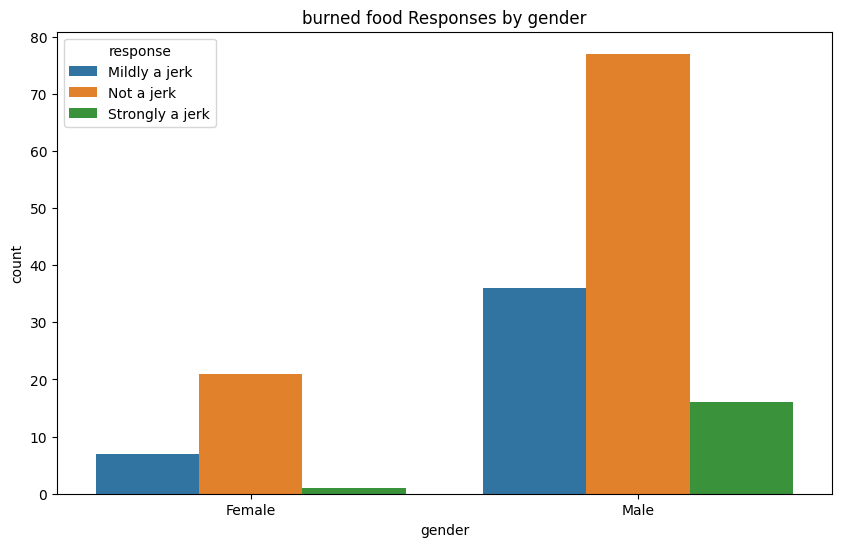

My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-mother practically raised him from a baby and I think that she deserves it far more than me. He was really upset and hurt when I said no. Am I a jerk?'


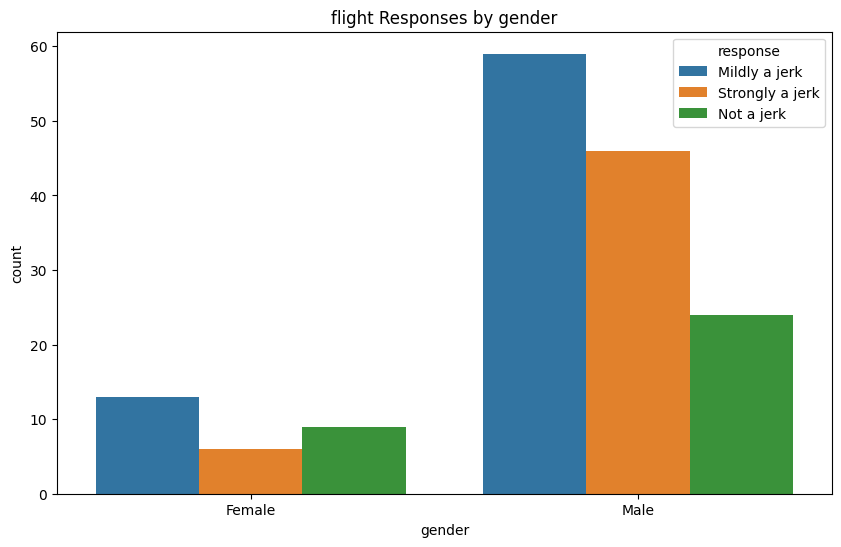

I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my boyfriend, who comes from a poor family, and we split things 50-50. Recently, he found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making him split things 50/50. I told him it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?


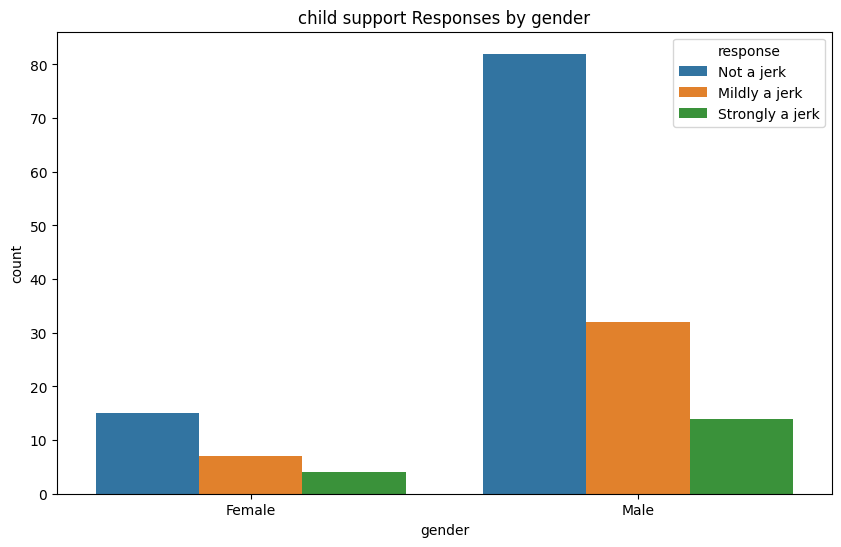

In [37]:
sort_by = 'gender'
diffs = ["burned food", "flight", "child support"]
for i in range(len(diffs)):
    print(questions[i+7])
    df_melted = df_male_questions.melt(id_vars=[sort_by], value_vars=[diffs[i]], var_name='question', value_name='response')

    plt.figure(figsize=(10,6))
    sns.countplot(data=df_melted, x=sort_by, hue='response')
    plt.title(diffs[i] + ' Responses by ' + sort_by)
    plt.show()

In [38]:
len(df_male_questions)

158

In [39]:

d = {"gendered": ["male"] * len(df_male_questions) + ["female"] * len(df_female_questions)}
d.update({i: list(df_male_questions[i]) + list(df_female_questions[i]) for i in questions_succint})

df_gendered = pd.DataFrame(d)

In [40]:
questions_succint

['year', 'age', 'upbringing', 'self', 'religion', 'gender']

In [41]:
for i in aita_questions:

    # Create a proper contingency table
    data = pd.crosstab(df_gendered["gendered"], df_gendered[i])
    print(data.head())
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

KeyError: 'doctor'

In [ ]:
"""
jerk when the guy is telling the woman what to do, less so otherwise

doctor    Mildly a jerk  Not a jerk  Strongly a jerk
gendered                                            
female               99          75               13
male                 57          95                6
doctor
p value is 0.0009585803589287614
Dependent (reject H0)

       'My girlfriend is a doctor. Lately she's been complaining about pain in her right knee 
       and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's 
       only gotten worse. I've told her she needs to see someone about it but she told me it was
         fine. So I told her that if this is how she treats herself, I'd be concerned about being 
         her patient. She was shocked and told me that was uncalled for. Am I a jerk?',
       
       'My boyfriend is a doctor. Lately he's been complaining about pain in his right knee 
       and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, 
       it's only gotten worse. I've told him he needs to see someone about it but he told me it 
       was fine. So I told him that if this is how he treats herself, I'd be concerned about being 
       his patient. He was shocked and told me that was uncalled for. Am I a jerk?',
       

moreso not a jerk when the woman is witholding the money

private school  Mildly a jerk  Not a jerk  Strongly a jerk
gendered                                                  
female                     65          85               34
male                       30         112               16
private school
p value is 2.4652236268615628e-05
Dependent (reject H0)

      'My wife and I have separate finances, but I pay for almost everything. My son starts 
      school next year, and I'm planning on sending him to a private school. My wife's son 
      currently goes to a much less nice public school. My wife says I'm a jerk for not paying 
      for her daughter to go to private school as well.',
      
      'My husband and I have separate finances, but I pay for almost everything. My son starts 
      school next year, and I'm planning on sending him to a private school. My husband's son
       currently goes to a much less nice public school. My husband says I'm a jerk for not paying 
       for his son to go to private school as well.',


TYPO - invalidates this question  
in law    Mildly a jerk  Not a jerk  Strongly a jerk
gendered                                            
1               57         127               11
2                 73          69               28
in law
p value is 3.825849535017417e-06
Dependent (reject H0)

       'I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment 
       about he's never paid child support to his ex. Later, he called me and told me if I ever 
       said anything like that ever again he'd sue me for defamation. I took the threat seriously, 
       as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around 
       him anymore. Am I a jerk?',

       'I was in a conflict with my father-in-law's girlfriend, in which I made a snide comment 
       about she's never paid child support to his ex. Later, she called me and told me if I ever 
       said anything like that ever again she'd sue me for defamation. I took the threat seriously, 
       as she is a lawyer, and uninvited him for our wedding and told my family I couldn't be around 
       him anymore. Am I a jerk?',
"""

"\njerk when the guy is telling the woman what to do, less so otherwise\n\ndoctor    Mildly a jerk  Not a jerk  Strongly a jerk\ngendered                                            \nfemale               99          75               13\nmale                 57          95                6\ndoctor\np value is 0.0009585803589287614\nDependent (reject H0)\n\n       'My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?',\n       \n       'My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotte

In [ ]:
succint = [
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender"
    ]

for i in aita_questions:

    # Create a proper contingency table
    data = pd.crosstab(df_gendered["gendered"], df_gendered[i])
    print(data.head())
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

doctor    Mildly a jerk  Not a jerk  Strongly a jerk
gendered                                            
female               99          75               13
male                 57          95                6
doctor
p value is 0.0009585803589287614
Dependent (reject H0)

reading   Mildly a jerk  Not a jerk  Strongly a jerk
gendered                                            
female               79          82               26
male                 66          73               18
reading
p value is 0.7670532164505425
Independent (H0 holds true)

trust fund  Mildly a jerk  Not a jerk  Strongly a jerk
gendered                                              
female                 67          81               39
male                   58          79               21
trust fund
p value is 0.16031832234205443
Independent (H0 holds true)

private school  Mildly a jerk  Not a jerk  Strongly a jerk
gendered                                                  
female                     65        

In [ ]:
for i in aita_questions:

    # Create a proper contingency table
    data = pd.crosstab(df_gendered["age"], df_gendered[i])
    print(data.head())
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

doctor  Mildly a jerk  Not a jerk  Strongly a jerk
age                                               
19.0               45          55                5
20.0               85          92               11
21.0               26          23                3
doctor
p value is 0.9061947504327428
Independent (H0 holds true)

reading  Mildly a jerk  Not a jerk  Strongly a jerk
age                                                
19.0                47          49                9
20.0                73          86               28
21.0                25          20                7
reading
p value is 0.4326543193876963
Independent (H0 holds true)

trust fund  Mildly a jerk  Not a jerk  Strongly a jerk
age                                                   
19.0                   34          53               18
20.0                   74          78               36
21.0                   17          29                6
trust fund
p value is 0.30651700488997935
Independent (H0 holds true)

privat